In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

machine = pd.read_csv('machine.csv')

In [2]:
machine.head()

vendor_name model_name  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0     adviser      32/60   125   256   6000   256     16    128  198  199
1      amdahl     470v/7    29  8000  32000    32      8     32  269  253
2      amdahl    470v/7a    29  8000  32000    32      8     32  220  253
3      amdahl    470v/7b    29  8000  32000    32      8     32  172  253
4      amdahl    470v/7c    29  8000  16000    32      8     16  132  132

In [3]:
machine.shape

(209, 10)

In [4]:
machine["vendor_name"].unique()

array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [5]:
machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
vendor_name    209 non-null object
model_name     209 non-null object
MYCT           209 non-null int64
MMIN           209 non-null int64
MMAX           209 non-null int64
CACH           209 non-null int64
CHMIN          209 non-null int64
CHMAX          209 non-null int64
PRP            209 non-null int64
ERP            209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [6]:
machine.describe()

MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   32.000000    6.000000   
max    1500.000000  32000.000000  64000.000000  256.000000   52.000000   

            CHMAX          PRP          ERP  
count  209.000000   209.000000   209.000000  
mean    18.267943   105.622010    99.330144  
std     25.997318   160.830733   154.757102  
min      0.000000     6.000000    15.000000  
25%      5.000000    27.000000    28.000000  
50%      8.000000    50.000000    45.000000  
75%     24.000000   113.000000   101.000000  
max    176.000000  1150.000000  1238.000000

In [7]:
machine.describe(include="all")

vendor_name model_name         MYCT          MMIN          MMAX  \
count          209        209   209.000000    209.000000    209.000000   
unique          30        209          NaN           NaN           NaN   
top            ibm    as/6650          NaN           NaN           NaN   
freq            32          1          NaN           NaN           NaN   
mean           NaN        NaN   203.822967   2867.980861  11796.153110   
std            NaN        NaN   260.262926   3878.742758  11726.564377   
min            NaN        NaN    17.000000     64.000000     64.000000   
25%            NaN        NaN    50.000000    768.000000   4000.000000   
50%            NaN        NaN   110.000000   2000.000000   8000.000000   
75%            NaN        NaN   225.000000   4000.000000  16000.000000   
max            NaN        NaN  1500.000000  32000.000000  64000.000000   

              CACH       CHMIN       CHMAX          PRP          ERP  
count   209.000000  209.000000  209.000000   209.000000   209.000000  
unique         NaN         NaN         NaN          NaN          NaN  
top            NaN         NaN         NaN          NaN          NaN  
freq           NaN         NaN         NaN          NaN          NaN  
mean     25.205742    4.698565   18.267943   105.622010    99.330144  
std      40.628722    6.816274   25.997318   160.830733   154.757102  
min       0.000000    0.000000    0.000000     6.000000    15.000000  
25%       0.000000    1.000000    5.000000    27.000000    28.000000  
50%       8.000000    2.000000    8.000000    50.000000    45.000000  
75%      32.000000    6.000000   24.000000   113.000000   101.000000  
max     256.000000   52.000000  176.000000  1150.000000  1238.000000

In [8]:
machine.dtypes

vendor_name    object
model_name     object
MYCT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
ERP             int64
dtype: object

In [9]:
#missing_data = machine.isnull()
#missing_data.head(10)

In [10]:
#for column in missing_data.columns.values.tolist():
    #print(column)
    #print(missing_data[column].value_counts())
    #print("")

# MEMBUAT GRAFIK
1. PRP vs ERP

2. MMIN, MMAX, CHMIN, CHMAX vs PRP

In [12]:
#Mengambil vendor yang jumlahnya di atas 9 untuk dianalisa
machine_counts = machine["vendor_name"].value_counts()
machine_take = machine_counts > 9

machine_keep = list(np.array(machine_counts.index.values)[np.array(machine_take)])
machines = machine.loc[machine['vendor_name'].isin(machine_keep)]

machines

vendor_name     model_name  MYCT   MMIN   MMAX  CACH  CHMIN  CHMAX   PRP  \
80    honeywell       dps:6/35   330   1000   3000     0      2      4    16   
81    honeywell       dps:6/92   300   1000   4000     8      3     64    38   
82    honeywell       dps:6/96   300   1000  16000     8      2    112    38   
83    honeywell       dps:7/35   330   1000   2000     0      1      2    16   
84    honeywell       dps:7/45   330   1000   4000     0      3      6    22   
85    honeywell       dps:7/55   140   2000   4000     0      3      6    29   
86    honeywell       dps:7/65   140   2000   4000     0      4      8    40   
87    honeywell       dps:8/44   140   2000   4000     8      1     20    35   
88    honeywell       dps:8/49   140   2000  32000    32      1     20   134   
89    honeywell       dps:8/50   140   2000   8000    32      1     54    66   
90    honeywell       dps:8/52   140   2000  32000    32      1     54   141   
91    honeywell       dps:8/62   140   2000  32000    32      1     54   189   
92    honeywell       dps:8/20   140   2000   4000     8      1     20    22   
93          ibm         3033:s    57   4000  16000     1      6     12   132   
94          ibm         3033:u    57   4000  24000    64     12     16   237   
95          ibm           3081    26  16000  32000    64     16     24   465   
96          ibm         3081:d    26  16000  32000    64      8     24   465   
97          ibm         3083:b    26   8000  32000     0      8     24   277   
98          ibm         3083:e    26   8000  16000     0      8     16   185   
99          ibm      370/125-2   480     96    512     0      1      1     6   
100         ibm        370/148   203   1000   2000     0      1      5    24   
101         ibm      370/158-3   115    512   6000    16      1      6    45   
102         ibm           38/3  1100    512   1500     0      1      1     7   
103         ibm           38/4  1100    768   2000     0      1      1    13   
104         ibm           38/5   600    768   2000     0      1      1    16   
105         ibm           38/7   400   2000   4000     0      1      1    32   
106         ibm           38/8   400   4000   8000     0      1      1    32   
107         ibm           4321   900   1000   1000     0      1      2    11   
108         ibm         4331-1   900    512   1000     0      1      2    11   
109         ibm        4331-11   900   1000   4000     4      1      2    18   
..          ...            ...   ...    ...    ...   ...    ...    ...   ...   
165         ncr          v8635    38   4000   8000    32     16     32    51   
166         ncr          v8650    38   4000   8000    32     16     32   116   
167         ncr          v8655    38   8000  16000    64      4      8   100   
168         ncr          v8665    38   8000  24000   160      4      8   140   
169         ncr          v8670    38   4000  16000   128     16     32   212   
181     siemens          7.521   240    512   1000     8      1      3     6   
182     siemens          7.531   240    512   2000     8      1      5    11   
183     siemens          7.536   105   2000   4000     8      3      8    22   
184     siemens          7.541   105   2000   6000    16      6     16    33   
185     siemens          7.551   105   2000   8000    16      4     14    58   
186     siemens          7.561    52   4000  16000    32      4     12   130   
187     siemens        7.865-2    70   4000  12000     8      6      8    75   
188     siemens        7.870-2    59   4000  12000    32      6     12   113   
189     siemens        7.872-2    59   8000  16000    64     12     24   188   
190     siemens        7.875-2    26   8000  24000    32      8     16   173   
191     siemens        7.880-2    26   8000  32000    64     12     16   248   
192     siemens        7.881-2    26   8000  32000   128     24     32   405   
193      sperry     1100/61-h1   116   2000   8000    32      5     28    70   
194 

In [26]:
machines["vendor_name"].value_counts()

ibm          32
nas          19
sperry       13
honeywell    13
ncr          13
siemens      12
Name: vendor_name, dtype: int64

In [13]:
machines.describe(include="all")

vendor_name model_name         MYCT          MMIN          MMAX  \
count          102        102   102.000000    102.000000    102.000000   
unique           6        102          NaN           NaN           NaN   
top            ibm    as/6650          NaN           NaN           NaN   
freq            32          1          NaN           NaN           NaN   
mean           NaN        NaN   208.892157   3422.000000  13568.745098   
std            NaN        NaN   307.197357   3466.247527  12668.353845   
min            NaN        NaN    17.000000     96.000000    512.000000   
25%            NaN        NaN    50.000000   1000.000000   4000.000000   
50%            NaN        NaN    92.000000   2000.000000   8000.000000   
75%            NaN        NaN   183.750000   4000.000000  16000.000000   
max            NaN        NaN  1500.000000  16000.000000  64000.000000   

              CACH       CHMIN       CHMAX          PRP         ERP  
count   102.000000  102.000000  102.000000   102.000000  102.000000  
unique         NaN         NaN         NaN          NaN         NaN  
top            NaN         NaN         NaN          NaN         NaN  
freq           NaN         NaN         NaN          NaN         NaN  
mean     29.068627    5.450980   18.862745   122.245098  117.156863  
std      42.398921    8.402766   30.337390   176.853939  160.706099  
min       0.000000    0.000000    0.000000     6.000000   15.000000  
25%       0.000000    1.000000    5.000000    22.500000   28.000000  
50%       8.000000    2.500000    8.000000    50.500000   54.500000  
75%      32.000000    6.000000   23.000000   138.500000  138.000000  
max     256.000000   52.000000  176.000000  1150.000000  978.000000

In [14]:
sample_n = 10
import random #?
random.seed(1234) #fungsi?
machines_test = machines.groupby("vendor_name", group_keys=False).apply(lambda x: x.sample(sample_n))
machines_test["vendor_name"].value_counts()

nas          10
sperry       10
ibm          10
honeywell    10
ncr          10
siemens      10
Name: vendor_name, dtype: int64

In [15]:
machines_test

vendor_name     model_name  MYCT   MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  \
86    honeywell       dps:7/65   140   2000   4000     0      4      8   40   
81    honeywell       dps:6/92   300   1000   4000     8      3     64   38   
91    honeywell       dps:8/62   140   2000  32000    32      1     54  189   
83    honeywell       dps:7/35   330   1000   2000     0      1      2   16   
80    honeywell       dps:6/35   330   1000   3000     0      2      4   16   
90    honeywell       dps:8/52   140   2000  32000    32      1     54  141   
85    honeywell       dps:7/55   140   2000   4000     0      3      6   29   
89    honeywell       dps:8/50   140   2000   8000    32      1     54   66   
92    honeywell       dps:8/20   140   2000   4000     8      1     20   22   
88    honeywell       dps:8/49   140   2000  32000    32      1     20  134   
102         ibm           38/3  1100    512   1500     0      1      1    7   
105         ibm           38/7   400   2000   4000     0      1      1   32   
118         ibm         4361-4    25   2000  12000     8      1      4   49   
103         ibm           38/4  1100    768   2000     0      1      1   13   
123         ibm         8130-b  1500    768   2000     0      0      0   18   
110         ibm         4331-2   900   1000   4000     8      1      2   22   
96          ibm         3081:d    26  16000  32000    64      8     24  465   
98          ibm         3083:e    26   8000  16000     0      8     16  185   
122         ibm         8130-a  1500    768   1000     0      0      0   12   
106         ibm           38/8   400   4000   8000     0      1      1   32   
146         nas        as/6630    60   4000  16000    64      5      8   93   
149         nas      as/7000-n    72   2000   8000    16      6      8  105   
143         nas        as/6130    75   4000  16000    16      1      6   66   
142         nas      as/5000-n    92   2000   8000     4      1      6   50   
139         nas      as/3000-n   115   2000   4000     2      1      5   40   
144         nas        as/6150    60   4000  16000    32      1      6   86   
154         nas      as/9000-n    48   4000  24000    32      8     24  214   
140         nas        as/5000    92   2000   8000    32      1      6   62   
156         nas        as/9060    30  16000  32000   256     16     24  510   
150         nas        as/8040    40   8000  16000    32      8     16  214   
162         ncr       v8575:ii    56   4000   8000     0      1      8   34   
161         ncr     v8565:ii-e    56   2000   8000     0      1      8   24   
166         ncr          v8650    38   4000   8000    32     16     32  116   
169         ncr          v8670    38   4000  16000   128     16     32  212   
164         ncr       v8595:ii    56   4000  16000     0      1      8   46   
158         ncr       v8545:ii    84   1000   2000     0      1      6   12   
163         ncr       v8585:ii    56   4000  12000     0      1      8   42   
165         ncr          v8635    38   4000   8000    32     16     32   51   
167         ncr          v8655    38   8000  16000    64      4      8  100   
160         ncr       v8565:ii    56   2000   6000     0      1      8   21   
190     siemens        7.875-2    26   8000  24000    32      8     16  173   
188     siemens        7.870-2    59   4000  12000    32      6     12  113   
181     siemens          7.521   240    512   1000     8      1      3    6   
191     siemens        7.880-2    26   8000  32000    64     12     16  248   
185     siemens          7.551   105   2000   8000    16      4     14   58   
182     siemens          7.531   240    512   2000     8      1      5   11   
186     siemens          7.561    52   4000  16000    32      4     12  130   
183     siemens          7.536   105   2000   4000     8      3      8   22   
184     siemens          7.541   105   2000   6000    16      6     16   33   
189     siemens        7.872-2    59   8000  16000    

In [21]:
vendor_mean = machines_test.groupby("vendor_name").mean()
vendor_mean

MYCT    MMIN     MMAX  CACH  CHMIN  CHMAX    PRP    ERP
vendor_name                                                          
honeywell    194.0  1700.0  12500.0  14.4    1.8   28.6   69.1   75.6
ibm          697.7  3581.6   8250.0   8.0    2.2    5.0   83.5   69.9
nas           68.4  4800.0  14800.0  48.6    4.8   10.9  144.0  134.9
ncr           51.6  3700.0  10000.0  25.6    5.8   15.0   65.8   77.6
siemens      101.7  3902.4  12100.0  28.0    5.7   12.6   98.2   94.7
sperry       105.8  2103.6  19600.0  34.4   10.7   41.1  183.6  190.3

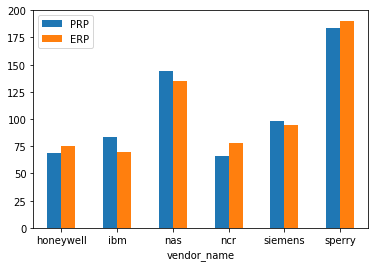

In [22]:
#df = pd.DataFrame(machines_test[["vendor_name"] == "sperry"], columns=['PRP', 'ERP'], index=machines_test["model_name"])
#df = pd.DataFrame(machines_test["ERP"], machines_test["PRP"], index=machines_test["model_name"])
df = pd.DataFrame(vendor_mean, columns=['PRP', 'ERP'])
ax = df.plot.bar(rot=0)

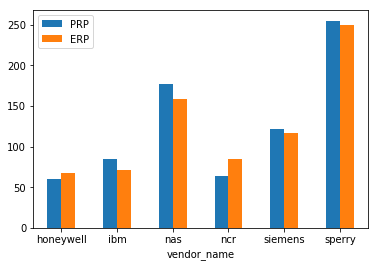

In [27]:
df = pd.DataFrame(machines.groupby("vendor_name").mean(), columns=['PRP', 'ERP'])
ax = df.plot.bar(rot=0)

In [28]:
machines.groupby("vendor_name").mean()

MYCT         MMIN          MMAX       CACH      CHMIN  \
vendor_name                                                                
honeywell    208.461538  1615.384615  11461.538462  12.307692   1.846154   
ibm          444.375000  3014.750000   9531.625000  10.718750   3.156250   
nas           64.421053  5368.421053  17894.736842  55.052632   5.684211   
ncr           55.538462  3615.384615   9923.076923  32.000000   4.923077   
siemens       92.750000  4252.000000  13750.000000  34.666667   7.250000   
sperry       101.384615  2426.769231  22769.230769  44.923077  13.230769   

                 CHMAX         PRP         ERP  
vendor_name                                     
honeywell    32.615385   60.461538   68.153846  
ibm           6.750000   85.093750   71.781250  
nas          13.473684  176.894737  159.105263  
ncr          12.923077   63.307692   84.769231  
siemens      13.833333  121.833333  116.333333  
sperry       53.384615  254.923077  249.692308

In [ ]:
df = pd.DataFrame(machines.groupby("MYCT"), columns=[])

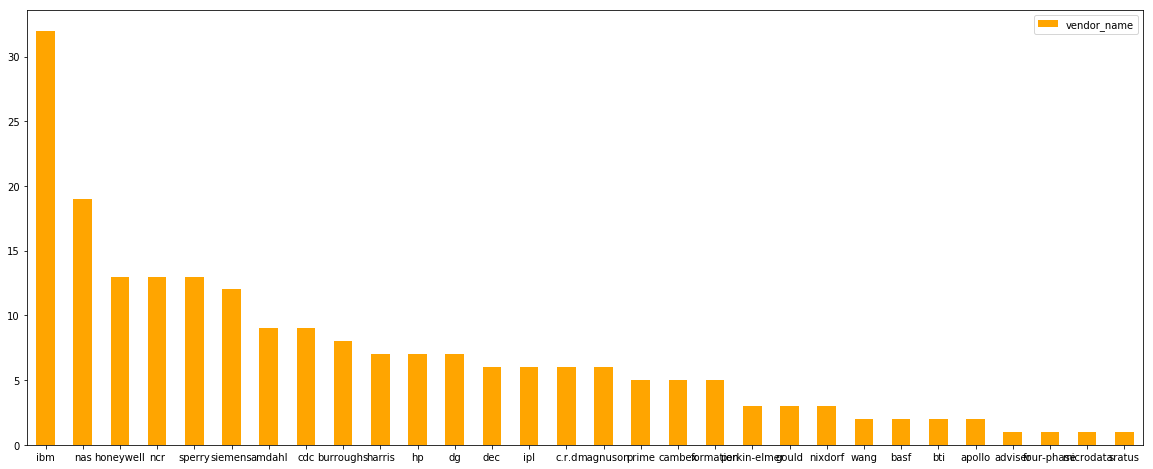

In [43]:
df = pd.DataFrame(machine["vendor_name"].value_counts())
ax = df.plot.bar(rot=0, figsize=(20,8), facecolor='orange')

In [44]:
machine["vendor_name"].value_counts()

ibm             32
nas             19
honeywell       13
ncr             13
sperry          13
siemens         12
amdahl           9
cdc              9
burroughs        8
harris           7
hp               7
dg               7
dec              6
ipl              6
c.r.d            6
magnuson         6
prime            5
cambex           5
formation        5
perkin-elmer     3
gould            3
nixdorf          3
wang             2
basf             2
bti              2
apollo           2
adviser          1
four-phase       1
microdata        1
sratus           1
Name: vendor_name, dtype: int64

In [45]:
machines

vendor_name     model_name  MYCT   MMIN   MMAX  CACH  CHMIN  CHMAX   PRP  \
80    honeywell       dps:6/35   330   1000   3000     0      2      4    16   
81    honeywell       dps:6/92   300   1000   4000     8      3     64    38   
82    honeywell       dps:6/96   300   1000  16000     8      2    112    38   
83    honeywell       dps:7/35   330   1000   2000     0      1      2    16   
84    honeywell       dps:7/45   330   1000   4000     0      3      6    22   
85    honeywell       dps:7/55   140   2000   4000     0      3      6    29   
86    honeywell       dps:7/65   140   2000   4000     0      4      8    40   
87    honeywell       dps:8/44   140   2000   4000     8      1     20    35   
88    honeywell       dps:8/49   140   2000  32000    32      1     20   134   
89    honeywell       dps:8/50   140   2000   8000    32      1     54    66   
90    honeywell       dps:8/52   140   2000  32000    32      1     54   141   
91    honeywell       dps:8/62   140   2000  32000    32      1     54   189   
92    honeywell       dps:8/20   140   2000   4000     8      1     20    22   
93          ibm         3033:s    57   4000  16000     1      6     12   132   
94          ibm         3033:u    57   4000  24000    64     12     16   237   
95          ibm           3081    26  16000  32000    64     16     24   465   
96          ibm         3081:d    26  16000  32000    64      8     24   465   
97          ibm         3083:b    26   8000  32000     0      8     24   277   
98          ibm         3083:e    26   8000  16000     0      8     16   185   
99          ibm      370/125-2   480     96    512     0      1      1     6   
100         ibm        370/148   203   1000   2000     0      1      5    24   
101         ibm      370/158-3   115    512   6000    16      1      6    45   
102         ibm           38/3  1100    512   1500     0      1      1     7   
103         ibm           38/4  1100    768   2000     0      1      1    13   
104         ibm           38/5   600    768   2000     0      1      1    16   
105         ibm           38/7   400   2000   4000     0      1      1    32   
106         ibm           38/8   400   4000   8000     0      1      1    32   
107         ibm           4321   900   1000   1000     0      1      2    11   
108         ibm         4331-1   900    512   1000     0      1      2    11   
109         ibm        4331-11   900   1000   4000     4      1      2    18   
..          ...            ...   ...    ...    ...   ...    ...    ...   ...   
165         ncr          v8635    38   4000   8000    32     16     32    51   
166         ncr          v8650    38   4000   8000    32     16     32   116   
167         ncr          v8655    38   8000  16000    64      4      8   100   
168         ncr          v8665    38   8000  24000   160      4      8   140   
169         ncr          v8670    38   4000  16000   128     16     32   212   
181     siemens          7.521   240    512   1000     8      1      3     6   
182     siemens          7.531   240    512   2000     8      1      5    11   
183     siemens          7.536   105   2000   4000     8      3      8    22   
184     siemens          7.541   105   2000   6000    16      6     16    33   
185     siemens          7.551   105   2000   8000    16      4     14    58   
186     siemens          7.561    52   4000  16000    32      4     12   130   
187     siemens        7.865-2    70   4000  12000     8      6      8    75   
188     siemens        7.870-2    59   4000  12000    32      6     12   113   
189     siemens        7.872-2    59   8000  16000    64     12     24   188   
190     siemens        7.875-2    26   8000  24000    32      8     16   173   
191     siemens        7.880-2    26   8000  32000    64     12     16   248   
192     siemens        7.881-2    26   8000  32000   128     24     32   405   
193      sperry     1100/61-h1   116   2000   8000    32      5     28    70   
194 

In [52]:
honeywell = machines[machines.vendor_name.isin(["honeywell"])]
honeywell

vendor_name model_name  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
80   honeywell   dps:6/35   330  1000   3000     0      2      4   16   23
81   honeywell   dps:6/92   300  1000   4000     8      3     64   38   30
82   honeywell   dps:6/96   300  1000  16000     8      2    112   38   73
83   honeywell   dps:7/35   330  1000   2000     0      1      2   16   20
84   honeywell   dps:7/45   330  1000   4000     0      3      6   22   25
85   honeywell   dps:7/55   140  2000   4000     0      3      6   29   28
86   honeywell   dps:7/65   140  2000   4000     0      4      8   40   29
87   honeywell   dps:8/44   140  2000   4000     8      1     20   35   32
88   honeywell   dps:8/49   140  2000  32000    32      1     20  134  175
89   honeywell   dps:8/50   140  2000   8000    32      1     54   66   57
90   honeywell   dps:8/52   140  2000  32000    32      1     54  141  181
91   honeywell   dps:8/62   140  2000  32000    32      1     54  189  181
92   honeywell   dps:8/20   140  2000   4000     8      1     20   22   32

In [117]:
mmax = machines.iloc[:, [0, 4]]
#mmax_df = pd.DataFrame(mmax, columns=machines["vendor_name"].unique())


In [154]:
mmax_honeywell = machines.iloc[:13, [0, 4]]
mmax_honeywell.describe()

MMAX
count     13.000000
mean   11461.538462
std    12224.397631
min     2000.000000
25%     4000.000000
50%     4000.000000
75%    16000.000000
max    32000.000000

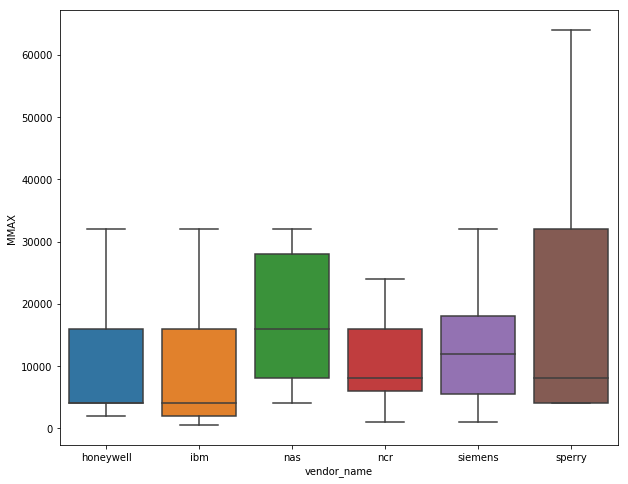

In [145]:
plt.figure(figsize=(10,8))
sns.boxplot(x="vendor_name", y="MMAX", data=machines )
plt.show()

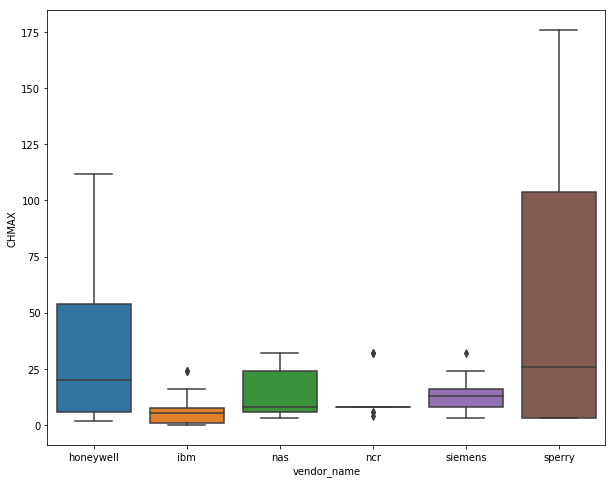

In [144]:
plt.figure(figsize=(10,8))
sns.boxplot(x="vendor_name", y="CHMAX", data=machines )
plt.show()

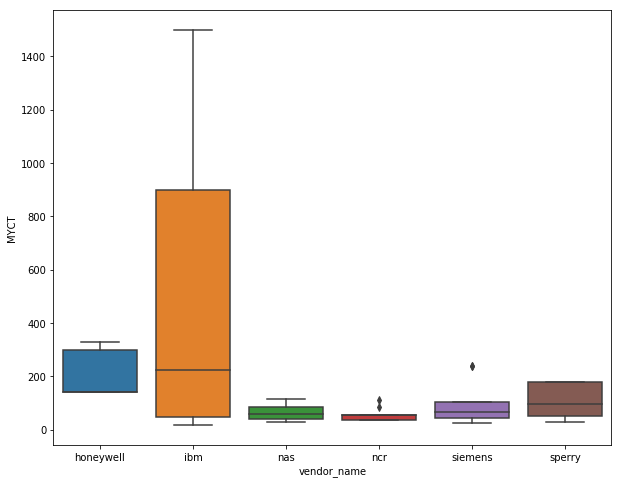

In [143]:
plt.figure(figsize=(10,8))
sns.boxplot(x="vendor_name", y="MYCT", data=machines )
plt.show()

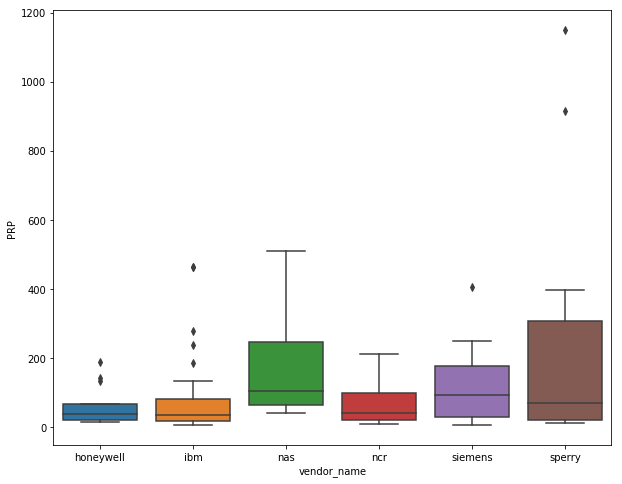

In [142]:
plt.figure(figsize=(10,8))
sns.boxplot(x="vendor_name", y="PRP", data=machines )
plt.show()

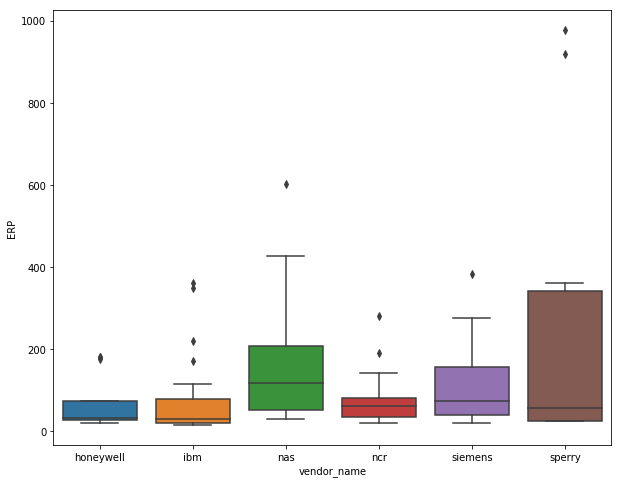

In [141]:
plt.figure(figsize=(10,8))
sns.boxplot(x="vendor_name", y="ERP", data=machines )
plt.show()